# Trial code with artificial categories, deeper than required network 

In [1]:

import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout, GaussianNoise
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, LabelBinarizer, MinMaxScaler

Using TensorFlow backend.


In [2]:
def process_attributes(df, train, test):
    cs = MinMaxScaler()
    trainContinuous = cs.fit_transform(train.iloc[:,0:24])
    testContinuous = cs.transform(test.iloc[:,0:24])
    zipBinarizer = LabelBinarizer().fit(df["Cat"])
    trainCategorical = zipBinarizer.transform(train["Cat"])
    testCategorical = zipBinarizer.transform(test["Cat"])
    # construct our training and testing data points by concatenating
    # the categorical features with the continuous features
    trainX = np.hstack([trainCategorical, trainContinuous])
    testX = np.hstack([testCategorical, testContinuous])
    # return the concatenated training and testing data
    return (trainX, testX)

In [3]:
#read the dataset with artificial categories
df = pd.read_excel('Overall Colorectal Cancer Generated data categorical.xlsx')
df.set_index('Name',inplace=True)

In [5]:
#extract inputs and outputs
df_outputs= df['Marker']
df.drop('Marker',axis=1,inplace=True)
df_inputs=df

In [6]:
#splitting the data to training and testing
train_inputs, test_inputs, train_outputs, test_outputs = train_test_split(df_inputs, df_outputs, test_size=0.3, shuffle=True)

In [7]:
#encode categorical variables and scale numerical ones
(train_inputs, test_inputs) = process_attributes(df_inputs, train_inputs, test_inputs)

In [8]:
#encode output variable
train_outputs = to_categorical(train_outputs)
test_outputs = to_categorical(test_outputs)

In [9]:
#Parameters used in the network
iterations = 100


In [10]:
#build classification model 
model =tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units = 13,
                         activation='sigmoid',
                         ))

model.add(tf.keras.layers.Dense(units = 13,
                         activation='sigmoid'))

model.add(tf.keras.layers.Dense(units = 13,
                         activation='sigmoid'))

model.add(tf.keras.layers.Dense(units = 13,
                         activation='sigmoid'))

model.add(tf.keras.layers.Dense(units = 2,
                         activation='softmax'))
#model = Sequential([
    #GaussianNoise(0.1,
    #    input_shape= (number_of_genes + PIs,)),
    #Dense(units = 24,
          #activation= 'sigmoid',
          #input_shape= (number_of_glycans + PIs,)),
   # Dropout(0.2),
   # Dense(units = 10,
   #       activation='sigmoid'),
   # Dense(units = 2,
   #       activation = 'softmax')])

In [11]:
#compile model
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [12]:
#fit model and store iteration data
history = model.fit(
    train_inputs,
    train_outputs,
    epochs = iterations,
    batch_size = 32,
    verbose = 0,
    shuffle = False)

In [13]:
#evaluate model with test data
print(model.evaluate(
    test_inputs,
    test_outputs,
    batch_size = 32,
    verbose = 1))

615/615 [==============================] - 0s 444us/sample - loss: 0.0534 - accuracy: 0.9772
[0.05335316670134785, 0.9772358]


In [14]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


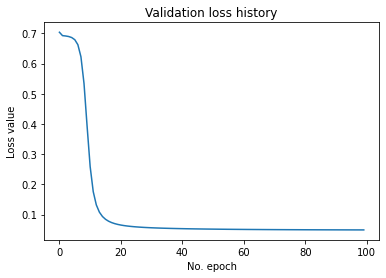

In [15]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

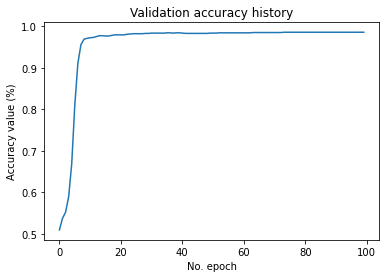

In [16]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()